In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


In [2]:
# Cargar dataset
data_path = '../preprocessing/preprocessed.csv'
data = pd.read_csv(data_path)

# Separar variables predictoras y objetivo
X = data.drop('price_category', axis=1)
y = data['price_category']



In [3]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
model_pool = {
    'LogisticRegression': LogisticRegression(max_iter=10000, random_state=42),
    'DecisionTree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'NaiveBayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=7),
    'SVC': SVC(probability=True, random_state=42),
    'MLP': MLPClassifier(max_iter=10000, random_state=42),
    'ExtraTrees': ExtraTreesClassifier(n_estimators=100, random_state=42),
    'QDA': QuadraticDiscriminantAnalysis()
}

predictions = {}
accuracies = {}

for name, model in model_pool.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    accuracies[name] = accuracy_score(y_test, y_pred)

results = []
for combo in combinations(model_pool.keys(), 3):
    preds_df = pd.DataFrame({name: pd.factorize(predictions[name])[0] for name in combo})
    corr = preds_df.corr().values[np.triu_indices(3, k=1)].mean()  # media de correlaciones entre modelos
    acc_vals = [accuracies[name] for name in combo]
    min_acc = min(acc_vals)
    results.append({
        'models': combo,
        'mean_correlation': corr,
        'min_accuracy': min_acc
    })

results_df = pd.DataFrame(results)
filtered_df = results_df[results_df['min_accuracy'] >= 0.5].sort_values(by='mean_correlation')

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

display(filtered_df.head(10))


c:\Users\alejf\Desktop\UNI_END\MD\Part2\.venv\lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\alejf\Desktop\UNI_END\MD\Part2\.venv\lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\alejf\Desktop\UNI_END\MD\Part2\.venv\lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\alejf\Desktop\UNI_END\MD\Part2\.venv\lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value 

,models,mean_correlation,min_accuracy
30,"(DecisionTree, SVC, MLP)",0.165606,0.701824
31,"(DecisionTree, SVC, ExtraTrees)",0.174598,0.701824
26,"(DecisionTree, KNN, SVC)",0.190784,0.587920
4,"(LogisticRegression, DecisionTree, ExtraTrees)",0.195458,0.701824
3,"(LogisticRegression, DecisionTree, MLP)",0.195849,0.701824
12,"(LogisticRegression, KNN, MLP)",0.198121,0.587920
1,"(LogisticRegression, DecisionTree, KNN)",0.205158,0.587920
27,"(DecisionTree, KNN, MLP)",0.211473,0.587920
13,"(LogisticRegression, KNN, ExtraTrees)",0.219266,0.587920
46,"(KNN, SVC, MLP)",0.222966,0.587920


In [5]:


clf_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_svc = SVC(probability=True, random_state=42)
clf_mlp = MLPClassifier(max_iter=500, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('dt', clf_dt),
        ('svc', clf_svc),
        ('mlp', clf_mlp)
    ],
    voting='soft'  # Todos estos modelos tienen predict_proba, puedes usar 'soft'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

from sklearn.metrics import classification_report
print("Majority Voting (soft) con DecisionTree, SVC y MLP:\n")
print(classification_report(y_test, y_pred))


Majority Voting (soft) con DecisionTree, SVC y MLP:

              precision    recall  f1-score   support

           1       0.83      0.84      0.83      1330
           2       0.68      0.69      0.68      1268
           3       0.73      0.70      0.72      1374
           4       0.74      0.76      0.75      1282
           5       0.89      0.87      0.88      1269

    accuracy                           0.77      6523
   macro avg       0.77      0.77      0.77      6523
weighted avg       0.77      0.77      0.77      6523



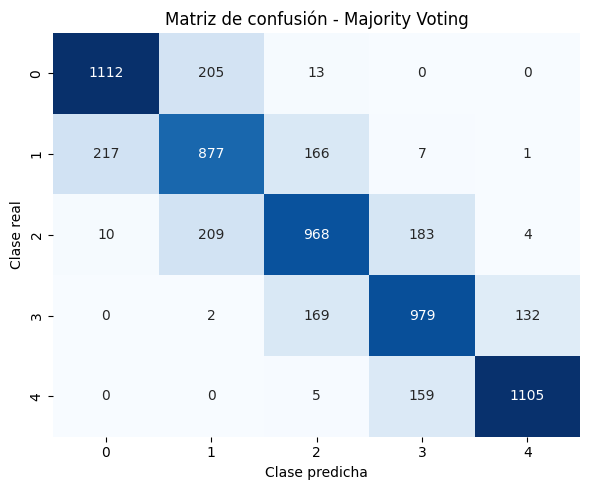

C:\Users\alejf\AppData\Local\Temp\ipykernel_4908\579455600.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='viridis')


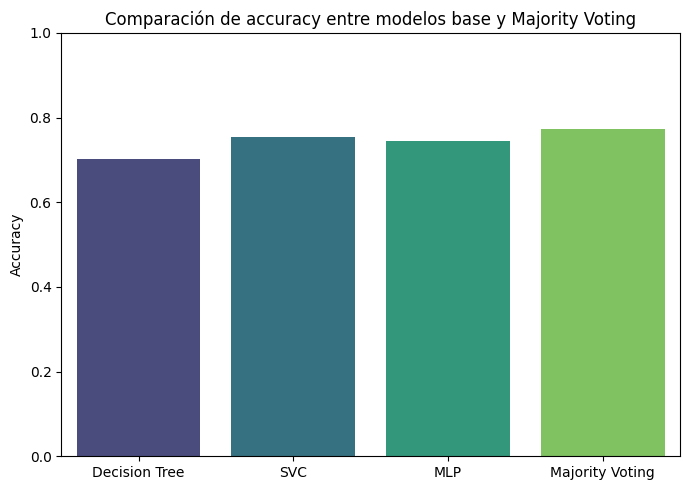

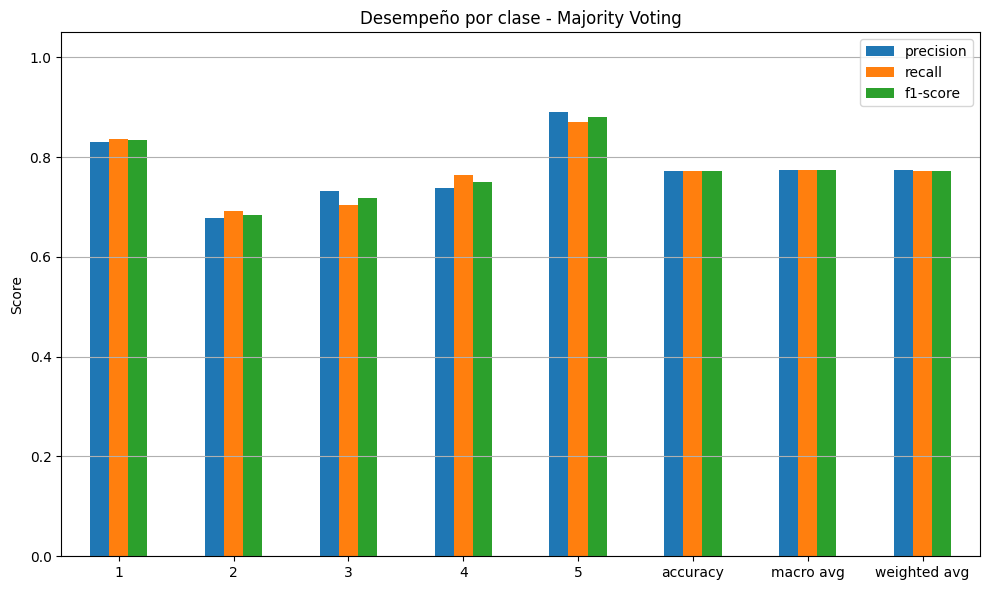

In [6]:

clf_dt.fit(X_train, y_train)
clf_svc.fit(X_train, y_train)
clf_mlp.fit(X_train, y_train)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de confusión - Majority Voting")
plt.xlabel("Clase predicha")
plt.ylabel("Clase real")
plt.tight_layout()
plt.show()

acc_dt = accuracy_score(y_test, clf_dt.predict(X_test))
acc_svc = accuracy_score(y_test, clf_svc.predict(X_test))
acc_mlp = accuracy_score(y_test, clf_mlp.predict(X_test))
acc_voting = accuracy_score(y_test, y_pred)

model_names = ['Decision Tree', 'SVC', 'MLP', 'Majority Voting']
accuracies = [acc_dt, acc_svc, acc_mlp, acc_voting]

plt.figure(figsize=(7,5))
sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Comparación de accuracy entre modelos base y Majority Voting")
plt.tight_layout()
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6))
plt.title("Desempeño por clase - Majority Voting")
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


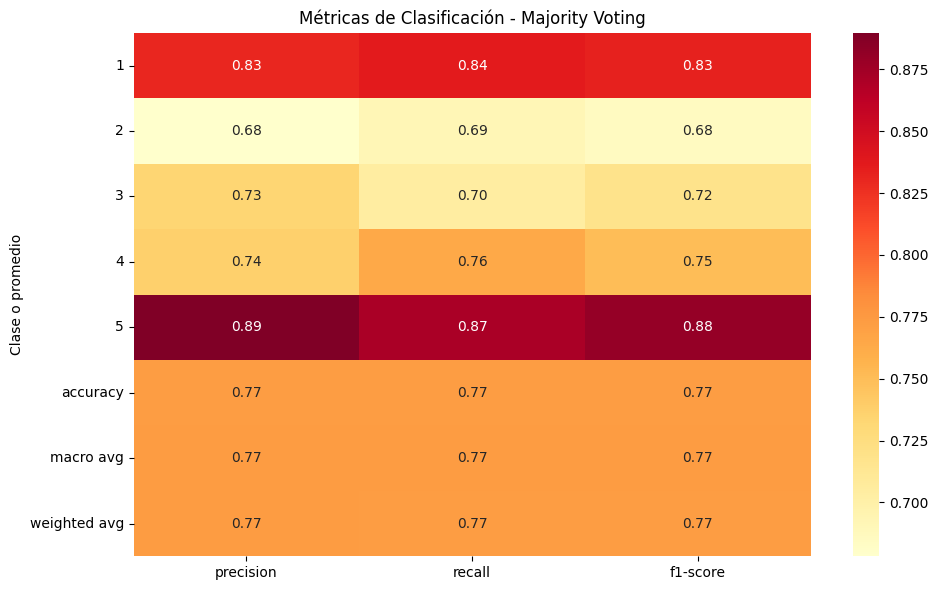

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_report[['precision', 'recall', 'f1-score']],  
            annot=True, 
            cmap='YlOrRd', 
            fmt='.2f')
plt.title('Métricas de Clasificación - Majority Voting')
plt.ylabel('Clase o promedio')
plt.tight_layout()
plt.show()


In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

n_estimators_list = [10, 50, 100]
max_samples_list = [0.5, 0.8, 1.0]
max_depth_list = [3, 5, None]

results = []

for n_est in n_estimators_list:
    for samp in max_samples_list:
        for depth in max_depth_list:
            base_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
            model = BaggingClassifier(
                estimator=base_tree,  
                n_estimators=n_est,
                max_samples=samp,
                bootstrap=True,
                n_jobs=-1,
                random_state=2205
            )

            scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
            results.append({
                'n_estimators': n_est,
                'max_samples': samp,
                'max_depth': depth,
                'mean_accuracy': scores.mean(),
                'std_accuracy': scores.std()
            })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='mean_accuracy', ascending=False).reset_index(drop=True)
import seaborn as sns
import matplotlib.pyplot as plt

display(df_results.head(10))


,n_estimators,max_samples,max_depth,mean_accuracy,std_accuracy
0,100,0.8,NaN,0.822513,0.001959
1,50,0.8,NaN,0.821330,0.003154
2,100,1.0,NaN,0.819293,0.001682
3,50,1.0,NaN,0.817519,0.002440
4,100,0.5,NaN,0.815941,0.004402
5,50,0.5,NaN,0.813576,0.003186
6,10,1.0,NaN,0.805296,0.004100
7,10,0.8,NaN,0.803587,0.005376
8,10,0.5,NaN,0.798200,0.002090
9,100,0.5,5.0,0.742213,0.004274


=== Bagging classification report

              precision    recall  f1-score   support

           1       0.85      0.87      0.86      1330
           2       0.74      0.73      0.73      1268
           3       0.79      0.79      0.79      1374
           4       0.82      0.82      0.82      1282
           5       0.92      0.90      0.91      1269

    accuracy                           0.82      6523
   macro avg       0.82      0.82      0.82      6523
weighted avg       0.82      0.82      0.82      6523



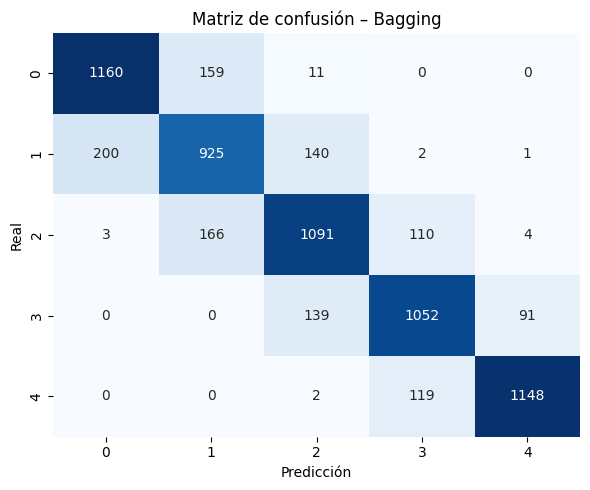

C:\Users\alejf\AppData\Local\Temp\ipykernel_4908\2197429067.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Árbol base", "Bagging"], y=[acc_base, acc_bagg], palette="viridis")


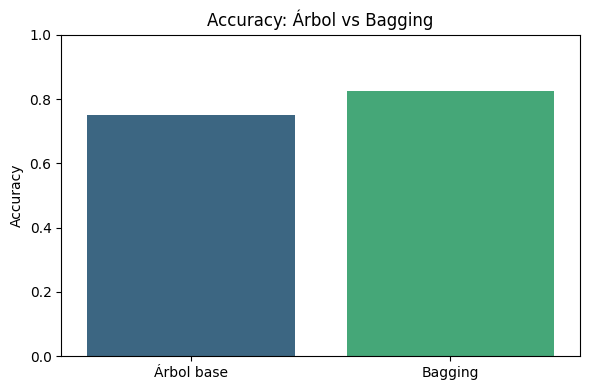

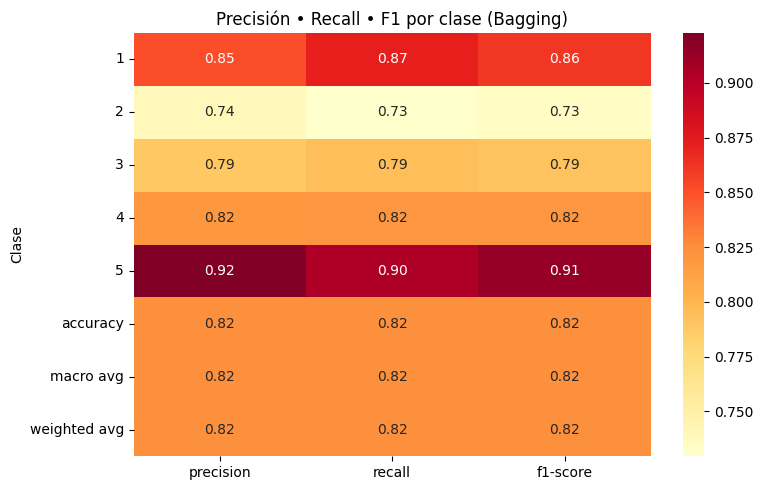

In [9]:

opt_tree   = DecisionTreeClassifier(max_depth=None, random_state=42)
bagging_clf = BaggingClassifier(
    estimator      = opt_tree,
    n_estimators   = 100,
    max_samples    = 0.8,
    bootstrap      = True,
    n_jobs         = -1,
    random_state   = 42
)

bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)

print("=== Bagging classification report\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de confusión – Bagging")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

base_tree = opt_tree.fit(X_train, y_train)
acc_base  = accuracy_score(y_test, base_tree.predict(X_test))
acc_bagg  = accuracy_score(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.barplot(x=["Árbol base", "Bagging"], y=[acc_base, acc_bagg], palette="viridis")
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Accuracy: Árbol vs Bagging")
plt.tight_layout()
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
df_rep = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,5))
sns.heatmap(df_rep[['precision','recall','f1-score']],
            annot=True, fmt='.2f', cmap='YlOrRd')
plt.title("Precisión • Recall • F1 por clase (Bagging)")
plt.ylabel("Clase")
plt.tight_layout()
plt.show()


In [10]:


n_estimators_list = [50, 100, 150]
max_features_list = ['sqrt', 'log2', None]
max_depth_list    = [10, 20, None]

results = []

for n_est in n_estimators_list:
    for max_feat in max_features_list:
        for depth in max_depth_list:
            clf = RandomForestClassifier(
                n_estimators=n_est,
                max_features=max_feat,
                max_depth=depth,
                random_state=42,
                n_jobs=-1
            )
            scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
            results.append({
                'n_estimators': n_est,
                'max_features': str(max_feat),
                'max_depth': str(depth),
                'mean_accuracy': scores.mean(),
                'std_accuracy': scores.std()
            })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='mean_accuracy', ascending=False)

from IPython.display import display
display(df_results.head(10))


,n_estimators,max_features,max_depth,mean_accuracy,std_accuracy
26,150,None,None,0.823367,0.002760
25,150,None,20,0.822316,0.002294
17,100,None,None,0.822053,0.001588
16,100,None,20,0.821856,0.002133
7,50,None,20,0.820344,0.004057
8,50,None,None,0.819358,0.003657
20,150,sqrt,None,0.817650,0.004902
11,100,sqrt,None,0.814759,0.004054
19,150,sqrt,20,0.813971,0.004602
10,100,sqrt,20,0.813050,0.003224


Random Forest Reporte de clasificación 

              precision    recall  f1-score   support

           1       0.85      0.87      0.86      1330
           2       0.73      0.72      0.73      1268
           3       0.79      0.78      0.79      1374
           4       0.82      0.83      0.82      1282
           5       0.92      0.91      0.91      1269

    accuracy                           0.82      6523
   macro avg       0.82      0.82      0.82      6523
weighted avg       0.82      0.82      0.82      6523



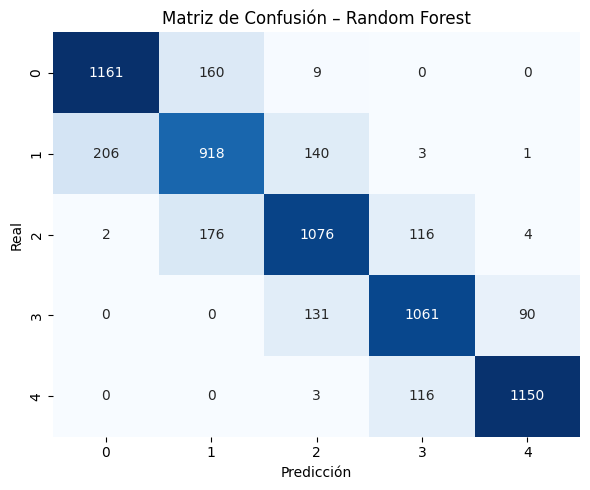

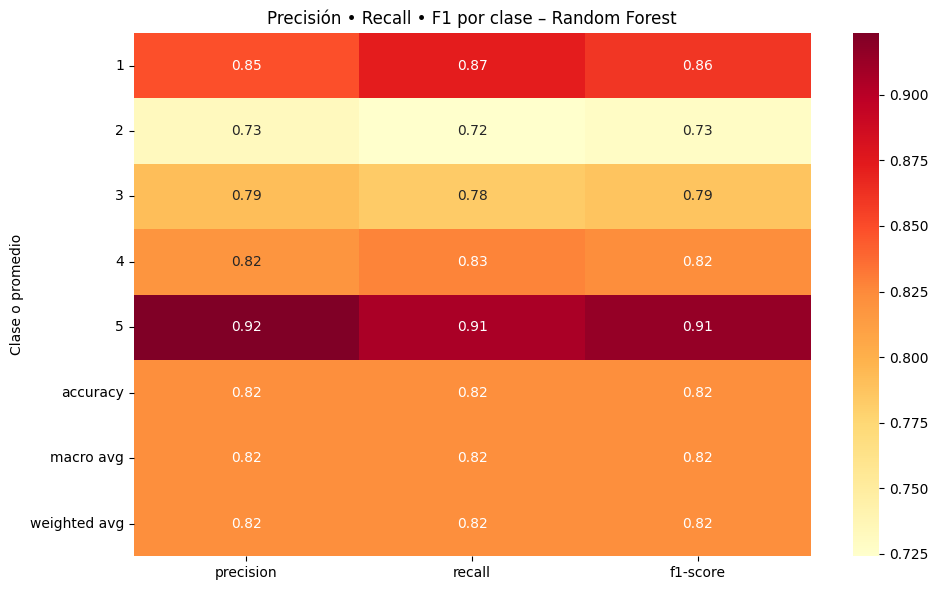

C:\Users\alejf\AppData\Local\Temp\ipykernel_4908\3827652829.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Árbol base", "Random Forest"], y=[acc_base, acc_rf], palette="viridis")


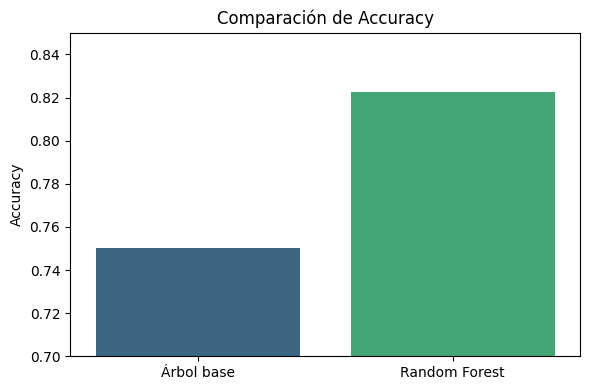

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

best_rf = RandomForestClassifier(
    n_estimators=150,
    max_features=None,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

print("Random Forest Reporte de clasificación \n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión – Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
df_rep = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_rep[['precision','recall','f1-score']], annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Precisión • Recall • F1 por clase – Random Forest")
plt.ylabel("Clase o promedio")
plt.tight_layout()
plt.show()

from sklearn.tree import DecisionTreeClassifier

base_tree = DecisionTreeClassifier(random_state=42)
base_tree.fit(X_train, y_train)
acc_base = accuracy_score(y_test, base_tree.predict(X_test))
acc_rf = accuracy_score(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.barplot(x=["Árbol base", "Random Forest"], y=[acc_base, acc_rf], palette="viridis")
plt.title("Comparación de Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.85)
plt.tight_layout()
plt.show()


In [12]:

n_estimators_list = [50, 100, 150]
learning_rates = [0.1, 0.5, 1.0]

results = []

for n_est in n_estimators_list:
    for lr in learning_rates:
        clf = AdaBoostClassifier(
            estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=n_est,
            learning_rate=lr,
            random_state=2205
        )
        scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        results.append({
            'n_estimators': n_est,
            'learning_rate': lr,
            'mean_accuracy': scores.mean(),
            'std_accuracy': scores.std()
        })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by='mean_accuracy', ascending=False)

from IPython.display import display
display(df_results.head(10))


,n_estimators,learning_rate,mean_accuracy,std_accuracy
6,150,0.1,0.647129,0.004995
3,100,0.1,0.633329,0.009183
8,150,1.0,0.618349,0.023983
5,100,1.0,0.596729,0.033137
1,50,0.5,0.595873,0.026992
0,50,0.1,0.584043,0.015116
7,150,0.5,0.583982,0.031813
4,100,0.5,0.581749,0.028740
2,50,1.0,0.562694,0.038557


AdaBoost Reporte de clasificación

              precision    recall  f1-score   support

           1       0.85      0.60      0.70      1330
           2       0.55      0.64      0.59      1268
           3       0.56      0.68      0.62      1374
           4       0.66      0.51      0.58      1282
           5       0.70      0.80      0.75      1269

    accuracy                           0.65      6523
   macro avg       0.67      0.65      0.65      6523
weighted avg       0.67      0.65      0.65      6523



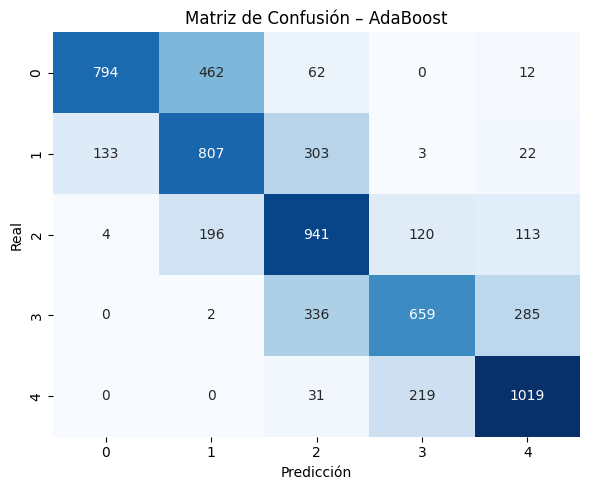

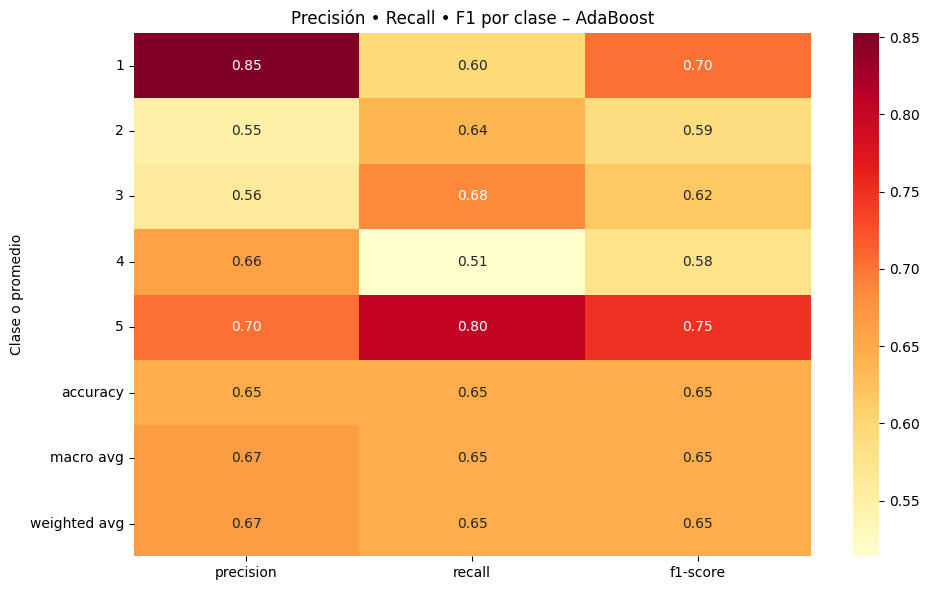

In [13]:


ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=150,
    learning_rate=0.1,
    random_state=42
)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print("AdaBoost Reporte de clasificación\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión – AdaBoost")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
df_rep = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 6))
sns.heatmap(df_rep[['precision','recall','f1-score']], annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Precisión • Recall • F1 por clase – AdaBoost")
plt.ylabel("Clase o promedio")
plt.tight_layout()
plt.show()


